<a href="https://colab.research.google.com/github/syno3/Data-science-portfolio/blob/main/Titanic-001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

### loading the dataset

In [2]:
df = pd.read_csv('titanic.csv',sep='\t', engine='python')
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


### Drop columns that will not be needed for training

In [3]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)
df.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S


### checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            30
SibSp           0
Parch           0
Fare            0
Embarked        1
dtype: int64

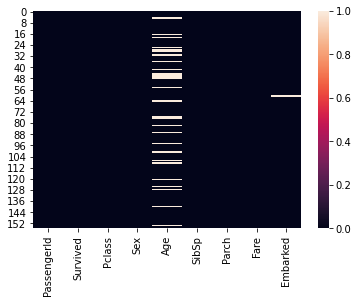

In [4]:
df.info()
sb.heatmap(df.isnull())
df.isnull().sum()

### Replace age value with interpolated on (ie)4,?6= 4+6/2 =5

In [5]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

### drop empty columns

In [ ]:
# Drop all rows with missin data
df = df.dropna()

### Replace columns that are not int to int 

In [7]:
#create dummy column
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

#add the columns to the dataframe
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

# Drop the redundant columns thus converted

df = df.drop(['Sex','Embarked'],axis=1)

### Mapping the data to X and Y

In [8]:
X = df.values
y = df['Survived'].values

### Delete survived columns from the x value

In [9]:
# Delete the Survived column from X
X = np.delete(X,1,axis=1)

### Split the data to training and testing

In [10]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Decision Tree Classifier

In [11]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8085106382978723

In [12]:
#Confusion matrix
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  7],
       [ 2,  9]])

### Random forest classifier

In [13]:
#Perform Classification Using Random Forest Classifier
from sklearn import ensemble

rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7659574468085106

### Gradient boosting classification

In [14]:
#Perform Classification Using Gradient Boosting Classifier
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.723404255319149

In [15]:
# Let's  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.7446808510638298